In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import datetime
from IPython.display import clear_output
import lightgbm as lgb
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

%matplotlib inline


RANDOM_STATE = 42

In [254]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression

In [256]:
#clf = MLPClassifier(hidden_layer_sizes=(50, 10), verbose=True, early_stopping=True)
clf = LogisticRegression()

In [255]:
sc = StandardScaler()

In [ ]:
clf.fit(sc.fit_transform(train[:400000][[f'V{i}' for i in range(1, 340)]].fillna(-1.0)), train[:400000].isFraud)

/home/ec2-user/miniconda3/envs/FRAUD/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
ys = clf.predict_proba(sc.transform(train[400000:][[f'V{i}' for i in range(1, 340)]].fillna(-1.0)))

In [240]:
ys[:, 1]

array([0.00576994, 0.00576994, 0.0191331 , ..., 0.00576994, 0.12758293,
       0.01226923])

In [241]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(train[400000:].isFraud, ys[:, 1])

In [2]:
from IPython.display import clear_output

In [3]:
from generate_features import generate_features_time_series
from read_utils import read_data
from feature_engineering import extract_registration_date

In [4]:
train, test, sample_submission = read_data()

In [5]:
train = extract_registration_date(train)
test = extract_registration_date(test)

In [ ]:
(1, 11),
        (12, 34),
        (35, 52),
        (53, 74),
        (75, 94),
        (95, 137),
        (138, 166),
        (167, 216),
        (217, 278),
        (279, 321),
        (322, 339)

In [6]:
def print_full(x):
    pd.set_option('display.max_rows', 2000)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', -1)
    #print(x)
#     pd.reset_option('display.max_rows')
#     pd.reset_option('display.max_columns')
#     pd.reset_option('display.width')
#     pd.reset_option('display.float_format')
#     pd.reset_option('display.max_colwidth')

In [7]:
print_full(train[train.card1 == 1039])

In [132]:
c_ = 'C9'
train[train[c_] == 9]['isFraud'].mean(), train[c_].unique()

(0.07803313735970069,
 array([  1.,   0.,   3.,   2.,  81.,   4.,  76., 129.,   9.,  64., 114.,
         17.,   6.,  79.,  14.,   5.,  97.,  43.,  13.,   8., 133.,  94.,
         88.,  55.,  54., 116.,  86.,  20.,  52.,   7.,  95.,  73.,  71.,
         12.,  11.,  15.,  16.,  26.,  87.,  10.,  25.,  72.,  34.,  59.,
         61.,  51.,  22.,  78.,  19.,  66.,  62.,  74.,  63.,  70.,  57.,
         67.,  69., 103.,  56.,  41.,  84.,  68.,  90.,  96.,  36.,  47.,
         83.,  65.,  42.,  49., 102.,  60.,  82.,  50.,  29.,  85., 111.,
         99., 110.,  80.,  27.,  48.,  45., 121., 108.,  44., 105.,  30.,
         18.,  58., 149., 150.,  91., 115.,  33., 122.,  89.,  75.,  77.,
         53.,  46., 166., 147.,  98.,  23., 151.,  28., 100.,  24.,  93.,
        137., 106., 125., 138., 135., 152., 154.,  32., 104.,  38., 120.,
        109., 159., 124., 117.,  92.,  40., 173.,  35., 118., 112., 119.,
        161., 146., 132., 155., 134., 130., 123., 156., 153., 160.,  31.,
        101., 13

In [144]:
ttt = train[c_].value_counts().reset_index()

,index,C7
0,0.00,523142
1,1.00,51966
2,2.00,7314
3,3.00,2033
4,4.00,1109
5,5.00,481
6,6.00,409
7,7.00,267
8,9.00,233
9,10.00,175


6


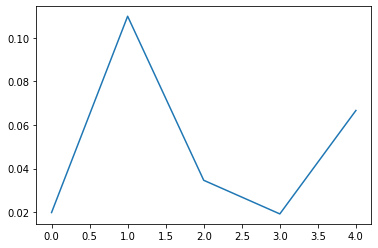

In [225]:
c_ = 'V50'
print(train[c_].nunique())

ttt = train[c_].value_counts().reset_index()
vals_to_use = ttt[ttt[c_] > 10].index

plt.plot(sorted(vals_to_use), [train[train[c_] == i]['isFraud'].mean() for i in sorted(vals_to_use)])

In [28]:
train.ProductCD.unique()

array(['W', 'H', 'C', 'S', 'R'], dtype=object)

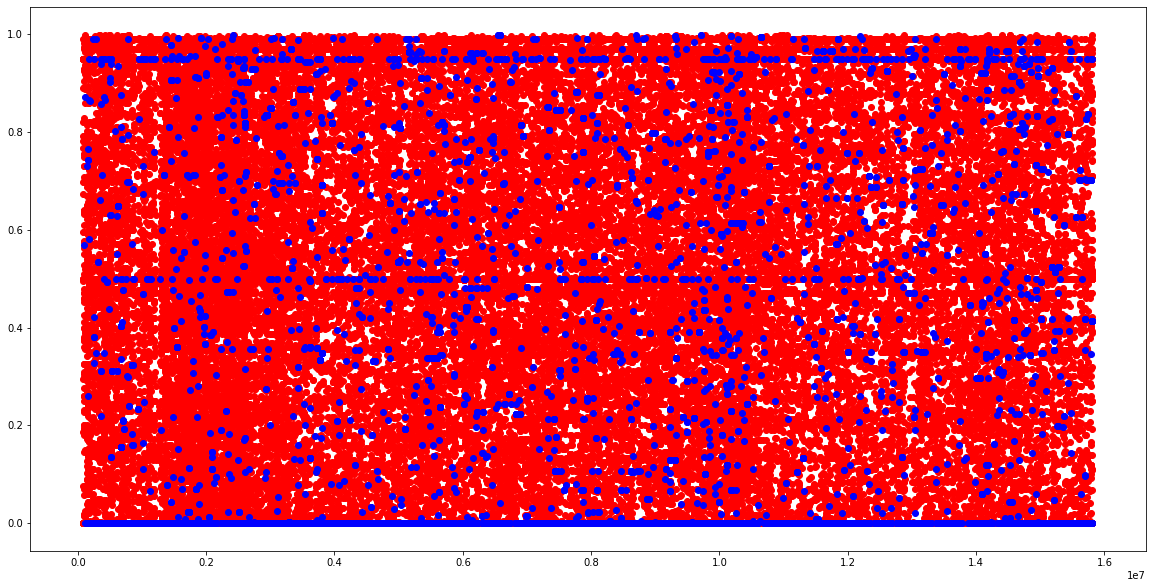

In [41]:
i = 2
field = 'C13'
plt.figure(figsize=(20, 10))
plt.scatter(train[(train[field] == i) & (train.isFraud == 0)].TransactionDT, train[(train[field] == i) & (train.isFraud == 0)].TransactionAmt - train[(train[field] == i) & (train.isFraud == 0)].TransactionAmt.astype(int), c='red')
plt.scatter(train[(train[field] == i) & (train.isFraud == 1)].TransactionDT, train[(train[field] == i) & (train.isFraud == 1)].TransactionAmt - train[(train[field] == i) & (train.isFraud == 1)].TransactionAmt.astype(int), c='blue')
plt.show()

In [60]:
train['TransactionDT_to_datetime'] = train['TransactionDT'].apply(
        lambda x: datetime.datetime.strptime('2017-11-30', '%Y-%m-%d') + datetime.timedelta(seconds=x)
    )

In [62]:
train = train.reset_index().set_index('TransactionDT_to_datetime')

In [86]:
train[train.card1 == 2939] \
            .groupby('ProductCD')['TransactionAmt'] \
            .rolling('4h', max_periods=1) \
            .apply(lambda x: x[int(x.shape[0] / 2)] if len(x) > 1 else 0.0)\
            .reset_index()\
            .sort_values('TransactionDT_to_datetime')['TransactionAmt']\
            .values

/home/ec2-user/miniconda3/envs/FRAUD/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  after removing the cwd from sys.path.


array([  0.  ,   0.  ,   0.  ,   0.  ,   0.  ,  30.  ,   0.  ,   0.  ,
         0.  ,  60.  ,  60.  ,  72.  ,   0.  ,  72.  ,   0.  , 108.5 ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,  54.  ,  54.  ,  44.  ,   0.  ,  54.  ,
        39.5 ,   0.  ,  39.  ,   0.  ,   0.  ,   0.  ,   0.  , 100.  ,
       100.  ,   0.  ,  44.  ,   0.  ,   0.  , 562.98, 562.98,   0.  ,
       499.94,   0.  ,  54.  ,  54.  ,  54.  ,  54.  ,  54.  ,  54.  ,
         0.  ,   0.  ,  54.  ,  54.  ,   0.  ,  46.  ,   0.  ,   0.  ,
         0.  ,   0.  ,  54.  ,   0.  ,   0.  , 524.95,   0.  ,  54.  ,
        54.  ,  54.  ,  54.  ,  54.  ,   0.  ,   0.  ,   0.  ,  82.  ,
        73.5 ,   0.  ,  82.  ,  82.  ,   0.  ,  73.5 ,   0.  ,  59.  ,
        59.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,  92.  ,  92.  ,  92.  ,
         0.  ,  92.  ,  92.  ,  77.  ,  77.  ,  92.  ,   0.  ,   0.  ,
      

In [249]:
train['TransactionDT_to_datetime'].dt.date.apply(lambda x: (x - datetime.date(1970, 1, 1)).total_seconds())

TransactionID
2987000       1,512,086,400.00
2987001       1,512,086,400.00
2987002       1,512,086,400.00
2987003       1,512,086,400.00
2987004       1,512,086,400.00
                  ...         
3577535       1,527,724,800.00
3577536       1,527,724,800.00
3577537       1,527,724,800.00
3577538       1,527,724,800.00
3577539       1,527,724,800.00
Name: TransactionDT_to_datetime, Length: 590540, dtype: float64

In [225]:
a.

TransactionID
2987000    00:00:00
2987001    00:00:01
2987002    00:01:09
2987003    00:01:39
2987004    00:01:46
             ...   
3577535    23:57:27
3577536    23:57:29
3577537    23:57:59
3577538    23:58:08
3577539    23:58:51
Name: TransactionDT_to_datetime, Length: 590540, dtype: object

In [199]:
train['TTTMP'] = pd.to_timedelta(train['D1'], unit='day')

In [203]:
train['subcard_reg_datetime'] = (train['TransactionDT_to_datetime'] - train['TTTMP']).dt.date

In [212]:
sorted(train[(train.card1 == 2939) & (train.ProductCD == 'W')][['isFraud'] + [f'V{i}' for i in range(126, 138)] + ['TransactionAmt', 'subcard_reg_datetime', 'ProductCD', 'addr1']]['subcard_reg_datetime'].unique())

[datetime.date(2017, 3, 12),
 datetime.date(2017, 4, 23),
 datetime.date(2017, 7, 5),
 datetime.date(2017, 7, 16),
 datetime.date(2017, 10, 27),
 datetime.date(2017, 10, 29),
 datetime.date(2017, 10, 31),
 datetime.date(2017, 11, 17),
 datetime.date(2017, 11, 18),
 datetime.date(2017, 11, 21),
 datetime.date(2017, 11, 22),
 datetime.date(2017, 11, 28),
 datetime.date(2017, 11, 29),
 datetime.date(2017, 12, 9),
 datetime.date(2017, 12, 13),
 datetime.date(2017, 12, 14),
 datetime.date(2017, 12, 22),
 datetime.date(2017, 12, 23),
 datetime.date(2018, 1, 2),
 datetime.date(2018, 1, 8),
 datetime.date(2018, 1, 10),
 datetime.date(2018, 1, 18),
 datetime.date(2018, 1, 19),
 datetime.date(2018, 1, 24),
 datetime.date(2018, 1, 30),
 datetime.date(2018, 2, 2),
 datetime.date(2018, 2, 9),
 datetime.date(2018, 2, 20),
 datetime.date(2018, 3, 2),
 datetime.date(2018, 3, 7),
 datetime.date(2018, 3, 8),
 datetime.date(2018, 3, 16),
 datetime.date(2018, 3, 23),
 datetime.date(2018, 3, 26),
 datetime

In [216]:
train[(train.card1 == 2939) & (train.ProductCD == 'W') & (train['subcard_reg_datetime'].isin([datetime.date(2017, 11, 28),
 datetime.date(2017, 11, 29)]))][['isFraud'] + [f'V{i}' for i in range(126, 138)] + ['TransactionAmt', 'subcard_reg_datetime', 'ProductCD', 'addr1']]

,isFraud,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,TransactionAmt,subcard_reg_datetime,ProductCD,addr1
TransactionID,,,,,,,,,,,,,,,,,
3069982,0,0.00,489.07,0.00,0.00,489.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,513.01,2017-11-28,W,472.00
3113875,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,499.94,2017-11-29,W,204.00


In [177]:
train.set_index('TransactionID', inplace=True)

In [181]:
train[:1000].groupby(['card1', 'ProductCD', 'addr1'])[[f'V{i}' for i in range(306, 322)]].diff()

,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
TransactionID,,,,,,,,,,,,,,,,
2987000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2987001,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2987002,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2987003,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2987004,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2987005,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2987006,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2987007,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2987008,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


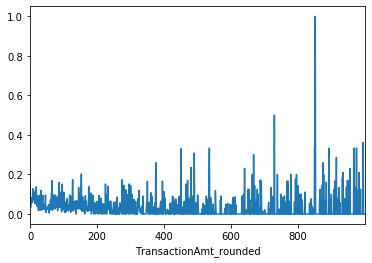

In [160]:
train[train['TransactionAmt_rounded'] < 1000].groupby(['TransactionAmt_rounded'])['isFraud'].mean().plot()

In [163]:
train[train['TransactionAmt_rounded'] == 300]['isFraud'].mean()

0.14419171405361494

In [162]:
train['TransactionAmt_rounded'].value_counts().head(50)

59     31626
117    29063
107    25229
57     24710
100    20562
50     17638
49     17228
25     16254
29     13519
39     12675
30     12453
226    11746
35     11134
47     10576
34     10333
77     9759 
150    8686 
171    7711 
108    7143 
200    6676 
209    6180 
97     6176 
67     5977 
54     5761 
15     5648 
335    5552 
20     5507 
75     5390 
87     5185 
159    5080 
44     5023 
92     4871 
24     4557 
58     4519 
82     4493 
40     4048 
26     3588 
250    3381 
31     3003 
36     2931 
280    2923 
311    2891 
554    2839 
42     2778 
53     2700 
445    2587 
10     2527 
141    2488 
48     2468 
300    2462 
Name: TransactionAmt_rounded, dtype: int64

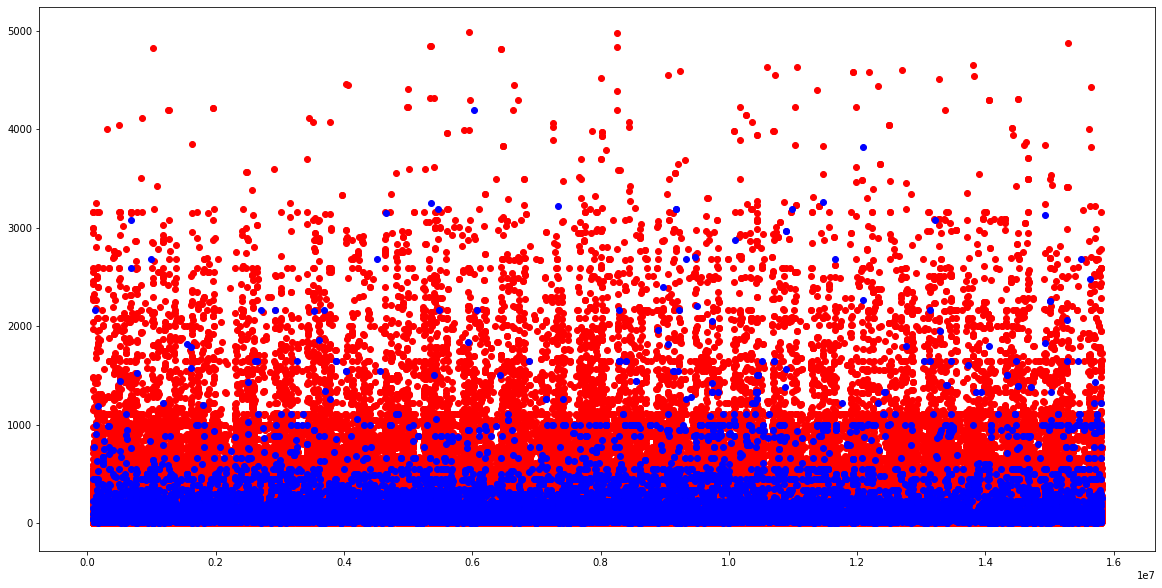

In [114]:
plt.figure(figsize=(20, 10))
plt.scatter(train[(train.isFraud == 0) & (train.TransactionAmt < 5000)].TransactionDT, train[(train.isFraud == 0) & (train.TransactionAmt < 5000)].TransactionAmt.astype(int), c='red')
plt.scatter(train[(train.isFraud == 1) & (train.TransactionAmt < 5000)].TransactionDT, train[(train.isFraud == 1) & (train.TransactionAmt < 5000)].TransactionAmt.astype(int), c='blue')
plt.show()

In [10]:
train[
    (train.subcard_categorical == '1085_2018-03-30C_2017-09-14_0.5')
][['TransactionDT_to_datetime','isFraud','subcard_categorical','TransactionAmt', 'D1', 'D2', 'D3', 'D4', 'D9']]

,TransactionDT_to_datetime,isFraud,subcard_categorical,TransactionAmt,D1,D2,D3,D4,D9
TransactionID,,,,,,,,,
3398653,2018-03-30 12:52:58,1,1085_2018-03-30C_2017-09-14_0.5,46.40,0.00,nan,nan,197.00,0.50


In [9]:
train[
    (train.card1 == 1129)
][['TransactionDT_to_datetime','isFraud','subcard_categorical','TransactionAmt', 'D1', 'D2', 'D3', 'D4','D8' ,'D9']]

,TransactionDT_to_datetime,isFraud,subcard_categorical,TransactionAmt,D1,D2,D3,D4,D8,D9
TransactionID,,,,,,,,,,
2991792,2017-12-01 23:04:32,1,1129_2017-11-18C_NaT_nan,47.13,13.00,nan,14.00,nan,nan,nan
2996652,2017-12-03 05:58:45,0,1129_2017-12-03C_NaT_nan,30.81,0.00,nan,nan,0.00,nan,nan
2998422,2017-12-03 21:37:00,0,1129_2017-12-03C_2017-12-03_0.875,81.63,0.00,nan,nan,nan,0.88,0.88
3000139,2017-12-04 06:51:01,0,1129_2017-12-04C_NaT_nan,48.33,0.00,nan,nan,0.00,nan,nan
3006957,2017-12-05 23:33:21,0,1129_2017-12-05C_NaT_nan,32.63,0.00,nan,nan,0.00,nan,nan
3023123,2017-12-10 03:08:29,1,1129_2017-04-16C_NaT_nan,8.51,238.00,238.00,nan,238.00,nan,nan
3035383,2017-12-13 05:00:43,0,1129_2017-11-22C_2017-04-22_0.20833300054073334,41.74,21.00,nan,20.00,235.00,235.21,0.21
3043438,2017-12-15 01:26:35,1,1129_2017-11-18C_2017-12-01_0.04166600108146668,62.38,27.00,nan,13.00,0.00,14.04,0.04
3050627,2017-12-16 18:10:42,1,1129_2017-11-18C_NaT_nan,16.91,28.00,nan,2.00,2.00,nan,nan


In [64]:
tmp = train[train.card1 == 1039]

In [78]:
tmp[
    (tmp.C1 == 1.0) & (tmp.C5 == 1) & (tmp.C6 == 1) & (tmp.C7 == 0)
][['isFraud'] + [f'C{i}' for i in range(1, 15)] + ['TransactionAmt']].shape

(41, 16)

In [ ]:
1129, 1208

In [18]:
for ind, i in train.groupby('card1'):
    print(ind, i['isFraud'].mean(), len(i))
    
    if ind < 3090:
        continue
    
    #print(i)
    
    #print(i[i['isFraud'] > 0])
    
    a = input()
    clear_output()

1000 0.0 1
1001 0.0 3
1004 0.0 5
1005 0.0 1
1006 0.0 3
1007 0.0 2
1008 0.0 3
1009 0.0 5
1010 0.0 1
1011 0.0 2
1012 0.0 8
1013 0.0 11
1014 0.0 2
1015 0.125 8
1016 0.07142857142857142 14
1018 0.0 3
1020 0.0 1
1021 0.0 7
1022 0.125 8
1023 0.0 3
1024 0.0 1
1026 0.0 1
1027 0.0 15
1028 0.0 37
1029 0.0 1
1030 0.008130081300813009 123
1031 0.0 3
1032 0.0 1
1033 0.0 3
1034 0.0 5
1035 0.0 1
1036 0.0 8
1037 0.0 1
1038 0.0 1
1039 0.007547169811320755 530
1040 0.0 1
1041 0.0 1
1042 0.0 10
1043 0.3333333333333333 6
1045 1.0 1
1046 0.0 2
1047 0.18181818181818182 22
1048 0.0 6
1049 0.0 5
1050 0.0 1
1051 0.0 1
1052 0.0 3
1053 0.0 1
1054 0.0 1
1055 0.0 2
1056 0.0 8
1057 0.0 7
1058 0.0 4
1059 0.0 2
1060 0.0 1
1062 0.0 2
1063 0.0 1
1064 0.3333333333333333 12
1066 0.0 15
1067 0.0 2
1068 0.5 2
1070 0.0 23
1072 0.0 3
1073 0.0 1
1074 0.0 2
1075 0.0 2
1076 0.0 3
1078 0.02027027027027027 592
1079 0.0 11
1080 0.4 5
1081 0.0 3
1082 0.0 2
1083 0.07692307692307693 13
1084 0.0 1
1085 0.16115702479338842 242
1087 0.0

1947 1.0 1
1948 0.0 1
1949 0.0 1
1950 0.0 6
1952 0.0 1
1953 0.0 7
1954 0.0 62
1955 0.0 168
1956 0.0 2
1957 0.0 1
1958 0.0 6
1959 0.0 1
1960 0.3333333333333333 6
1961 0.0 1
1963 0.0 1
1965 0.0 2
1966 0.0 4
1967 0.0 6
1968 0.0 29
1973 0.0 1
1974 0.0043997485857950975 1591
1975 0.14285714285714285 14
1976 0.19073275862068967 928
1979 0.0 3
1980 0.0 6
1981 0.0 1
1982 0.0 7
1983 0.0 2
1984 0.0 7
1985 0.0 1
1986 0.0 13
1987 0.0 2
1988 0.0 3
1990 0.0 8
1991 0.0 34
1992 0.0 2
1993 0.0 7
1994 0.0 2
1995 0.0 4
1996 0.0 3
1997 0.0 1
1998 0.0 10
1999 0.0 7
2000 0.0 2
2002 0.0 1
2003 0.0 1
2004 0.0 1
2005 0.0 12
2006 0.0 8
2007 0.0 4
2008 0.0 5
2010 0.0 2
2011 0.0 9
2012 0.0 1
2013 0.0 3
2016 0.0 1
2017 0.0 1
2018 0.0 5
2019 0.0 8
2020 0.012121212121212121 165
2021 0.21428571428571427 28
2022 0.0 61
2023 0.0 16
2024 0.0 2
2025 0.0 1
2026 0.0 1
2027 0.0 10
2028 0.0 3
2029 0.0 2
2031 0.0 15
2032 0.0 1
2033 0.0 6
2034 1.0 1
2035 0.0 9
2036 0.0 5
2037 0.14285714285714285 7
2039 0.03962264150943396 530


2937 0.0 1
2938 0.0 6
2939 0.44571428571428573 175
2940 0.0 1
2941 0.0 20
2942 0.0 3
2943 0.0 1
2944 0.0 6
2946 0.0 17
2947 0.04878048780487805 82
2948 0.0 5
2950 0.0 24
2951 0.0 2
2952 0.0 23
2953 0.0 1
2954 0.0 1
2955 0.0 6
2958 0.0 7
2960 0.0 27
2962 0.0 1
2963 0.0 28
2964 0.0 2
2965 0.0 106
2966 0.0 3
2967 0.0 1
2968 0.0 3
2969 0.0 23
2970 0.0 1
2971 0.0 104
2972 0.0 8
2973 0.0 3
2974 0.0 3
2977 0.0 6
2978 0.0 1
2979 0.0 30
2981 0.0 10
2982 0.0 1
2983 0.0 1
2984 0.5 2
2985 0.0 1
2986 0.0 10
2987 0.0 5
2989 0.0 2
2990 0.0 1
2991 0.0 1
2992 0.0 1
2993 0.0 8
2994 0.01694915254237288 59
2995 0.0 7
2996 0.0 1
2997 0.0 16
2998 0.0 1
2999 0.0 6
3001 0.0 3
3002 0.0 31
3003 0.0 7
3004 0.0 15
3006 0.0 1
3009 0.0 21
3010 0.0 25
3012 0.5 2
3013 0.0 9
3014 0.0 1
3015 0.0 1
3018 0.0 1
3019 0.0 2
3020 0.0 45
3021 0.0 5
3022 0.0 3
3025 0.0 2
3026 0.0 1
3027 0.0 2
3028 0.0 19
3029 0.0 2
3031 0.0 9
3032 0.0 3
3033 0.0 45
3034 0.0 1
3036 0.0 1
3040 0.0 16
3041 0.0 3
3043 0.0 2
3044 0.0 2
3046 0.2 10


KeyboardInterrupt: 

In [6]:
v_groups = defaultdict(list)

for i in range(1, 340):
    print(i, sum(train[f'V{i}'].notnull()))
    
    v_groups[sum(train[f'V{i}'].notnull())].append(f'V{i}')

1 311253
2 311253
3 311253
4 311253
5 311253
6 311253
7 311253
8 311253
9 311253
10 311253
11 311253
12 514467
13 514467
14 514467
15 514467
16 514467
17 514467
18 514467
19 514467
20 514467
21 514467
22 514467
23 514467
24 514467
25 514467
26 514467
27 514467
28 514467
29 514467
30 514467
31 514467
32 514467
33 514467
34 514467
35 421571
36 421571
37 421571
38 421571
39 421571
40 421571
41 421571
42 421571
43 421571
44 421571
45 421571
46 421571
47 421571
48 421571
49 421571
50 421571
51 421571
52 421571
53 513444
54 513444
55 513444
56 513444
57 513444
58 513444
59 513444
60 513444
61 513444
62 513444
63 513444
64 513444
65 513444
66 513444
67 513444
68 513444
69 513444
70 513444
71 513444
72 513444
73 513444
74 513444
75 501376
76 501376
77 501376
78 501376
79 501376
80 501376
81 501376
82 501376
83 501376
84 501376
85 501376
86 501376
87 501376
88 501376
89 501376
90 501376
91 501376
92 501376
93 501376
94 501376
95 590226
96 590226
97 590226
98 590226
99 590226
100 590226
101 5902

In [16]:
print(v_groups)

defaultdict(<class 'list'>, {311253: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11'], 514467: ['V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34'], 421571: ['V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52'], 513444: ['V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74'], 501376: ['V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94'], 590226: ['V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V12

TypeError: 'NoneType' object is not iterable

In [9]:
v_groups.keys()

dict_keys([311253, 514467, 421571, 513444, 501376, 590226, 81945, 81951, 139631, 139819, 130430, 141416, 590528, 589271, 82351])

In [21]:
train[[f'C{i}' for i in range(1, 15)]].corr()

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
C1,1.000000,0.995089,-0.003467,0.967800,0.165862,0.982238,0.926258,0.967746,0.175999,0.958202,0.996515,0.927939,0.774603,0.951761
C2,0.995089,1.000000,-0.003339,0.972134,0.126540,0.974845,0.938867,0.975863,0.133566,0.970624,0.993898,0.940258,0.751221,0.936148
C3,-0.003467,-0.003339,1.000000,-0.001720,-0.008101,-0.004711,-0.001730,-0.001203,-0.010074,-0.001494,-0.003583,-0.001763,-0.007747,-0.005091
C4,0.967800,0.972134,-0.001720,1.000000,-0.012842,0.962319,0.895092,0.959995,-0.015970,0.952466,0.974547,0.894619,0.644549,0.907676
C5,0.165862,0.126540,-0.008101,-0.012842,1.000000,0.232409,-0.009970,-0.011654,0.925786,-0.011846,0.168862,-0.009875,0.717509,0.378950
C6,0.982238,0.974845,-0.004711,0.962319,0.232409,1.000000,0.858583,0.921972,0.250695,0.914440,0.991105,0.858182,0.808531,0.984201
C7,0.926258,0.938867,-0.001730,0.895092,-0.009970,0.858583,1.000000,0.982983,-0.012399,0.985062,0.915209,0.999489,0.632394,0.794701
C8,0.967746,0.975863,-0.001203,0.959995,-0.011654,0.921972,0.982983,1.000000,-0.014492,0.996970,0.962722,0.983027,0.653245,0.860246
C9,0.175999,0.133566,-0.010074,-0.015970,0.925786,0.250695,-0.012399,-0.014492,1.000000,-0.014731,0.182446,-0.012212,0.704056,0.397396
C10,0.958202,0.970624,-0.001494,0.952466,-0.011846,0.914440,0.985062,0.996970,-0.014731,1.000000,0.956056,0.983817,0.653941,0.853009


In [32]:
train['C12'].value_counts().head(50)

0.0      489199
1.0       76661
2.0       12242
3.0        4185
4.0        1716
5.0        1085
6.0         629
7.0         393
8.0         262
9.0         177
10.0        176
12.0        107
15.0        105
17.0        104
14.0        101
13.0         94
18.0         87
11.0         82
16.0         72
27.0         72
23.0         63
28.0         59
22.0         45
19.0         38
131.0        38
25.0         36
20.0         36
21.0         34
24.0         33
145.0        33
146.0        32
34.0         32
135.0        30
132.0        29
30.0         26
83.0         26
67.0         25
43.0         24
133.0        23
33.0         21
32.0         21
127.0        19
31.0         17
59.0         17
154.0        17
29.0         17
42.0         16
26.0         16
47.0         15
52.0         15
Name: C12, dtype: int64

(array([5.87969e+05, 3.64000e+02, 2.74000e+02, 1.52000e+02, 3.53000e+02,
        7.60000e+01, 1.30000e+01, 3.20000e+01, 2.10000e+01, 2.70000e+01,
        6.00000e+00, 1.40000e+01, 1.30000e+01, 1.60000e+01, 1.80000e+01,
        1.50000e+01, 3.00000e+00, 1.80000e+01, 1.90000e+01, 1.20000e+01,
        3.70000e+01, 1.80000e+01, 1.20000e+01, 1.50000e+01, 2.10000e+01,
        1.90000e+01, 2.20000e+01, 2.10000e+01, 1.30000e+01, 1.10000e+01,
        1.80000e+01, 1.20000e+01, 1.80000e+01, 1.40000e+01, 2.20000e+01,
        2.00000e+01, 9.00000e+00, 2.40000e+01, 1.50000e+01, 2.00000e+01,
        3.50000e+01, 2.10000e+01, 3.00000e+00, 1.50000e+01, 1.30000e+01,
        2.30000e+01, 3.30000e+01, 3.40000e+01, 2.30000e+01, 1.50000e+01,
        7.00000e+00, 2.40000e+01, 1.20000e+01, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 7.00000e+00, 2.60000e+01, 2.00

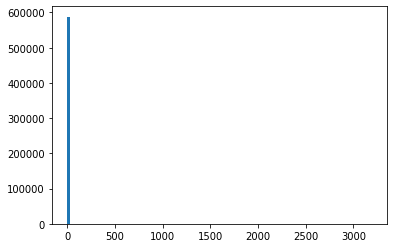

In [35]:
plt.hist(train['C12'], bins=100)

(array([5.0409e+05, 6.5300e+02, 2.2600e+02, 8.7000e+01, 5.5000e+01,
        3.5000e+01, 5.6000e+01, 3.7000e+01, 3.0000e+00, 1.2100e+02,
        9.7000e+01, 9.8000e+01, 6.3000e+01, 2.8600e+02, 9.2000e+01,
        0.0000e+00, 1.0000e+01, 3.5000e+01, 3.0000e+00, 0.0000e+00,
        6.0000e+00, 1.8000e+01, 2.6000e+01, 4.7000e+01, 2.0000e+01,
        3.2000e+01, 1.9000e+01, 1.7000e+01, 1.5000e+01, 1.5000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1000e+01, 7.0000e+00,
        1.5000e+01, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 1.5000e+01, 6.0000e+00,
        2.0000e+00, 1.8000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 3.2000e+01,
        2.6000e+01, 5.0000e+00, 1.2000e+01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

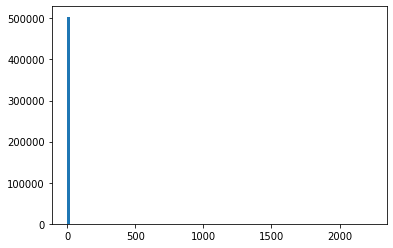

In [36]:
plt.hist(test['C12'], bins=100)

In [30]:
test['id_13'].value_counts().head(50)

27.0    69616
52.0    51661
14.0     3928
62.0      939
20.0      926
63.0      582
18.0      530
11.0      517
41.0      432
55.0      258
25.0      236
24.0      213
51.0      153
15.0      148
43.0       65
28.0       18
39.0       11
36.0       10
56.0       10
31.0        9
42.0        8
21.0        5
16.0        3
44.0        2
30.0        2
37.0        2
48.0        2
Name: id_13, dtype: int64

In [19]:
for i in range(1, 15):
    print(train[f'C{i}'].describe())

count    590540.000000
mean         14.092458
std         133.569018
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        4685.000000
Name: C1, dtype: float64
count    590540.000000
mean         15.269734
std         154.668899
min           0.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        5691.000000
Name: C2, dtype: float64
count    590540.000000
mean          0.005644
std           0.150536
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          26.000000
Name: C3, dtype: float64
count    590540.000000
mean          4.092185
std          68.848459
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        2253.000000
Name: C4, dtype: float64
count    590540.000000
mean          5.571526
std          25.786976
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max

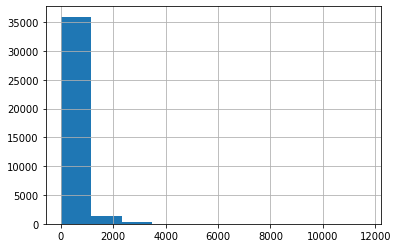

In [44]:
train['dist2'].hist()

In [ ]:
train['Tr']

In [49]:
train.iloc[10]['Tr']

0

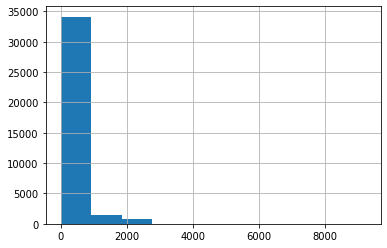

In [45]:
test['dist2'].hist()

(array([280130.,  13603.,  10600.,  17948.,  22770.,  34371.,  42104.,
         47800.,  53271.,  66674.]),
 array([0.        , 0.64630295, 1.29260589, 1.93890884, 2.58521178,
        3.23151473, 3.87781767, 4.52412062, 5.17042357, 5.81672651,
        6.46302946]),
 <a list of 10 Patch objects>)

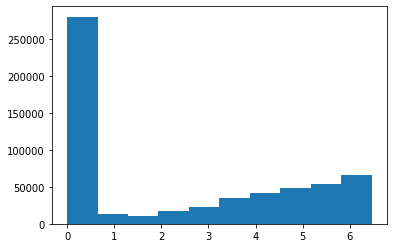

In [54]:
plt.hist(np.log(train['D1'] + 1), bins=10)

/home/ec2-user/miniconda3/envs/FRAUD/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/ec2-user/miniconda3/envs/FRAUD/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([397296.,  48422.,  31453.,  23507.,  18065.,  17238.,  13545.,
         16171.,  13612.,   9962.]),
 array([  0.,  64., 128., 192., 256., 320., 384., 448., 512., 576., 640.]),
 <a list of 10 Patch objects>)

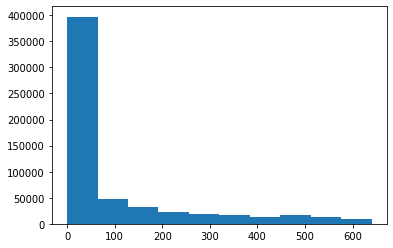

In [53]:
plt.hist(train['D1'], bins=10)

In [1]:
from generate_features import exchange_rate_took_place_feature

In [5]:
train = exchange_rate_took_place_feature(train)

In [6]:
train.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,is_foreign
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,False


In [7]:
from sklearn.metrics import roc_auc_score

In [8]:
roc_auc_score(train.isFraud, train.is_foreign)

0.6276821312858637

In [20]:
train['TransactionAmt'].agg('nunique')

20902

In [4]:
train.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [5]:
train.card1

TransactionID
2987000    13926
2987001     2755
2987002     4663
2987003    18132
2987004     4497
           ...  
3577535     6550
3577536    10444
3577537    12037
3577538     7826
3577539    15066
Name: card1, Length: 590540, dtype: int64

In [11]:
train.columns.tolist()

['isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67

In [27]:
train[(train.card1 == 6550) & train.isFraud][['TransactionAmt'] + [f'V{i}' for i in range(35, 52)]]

,TransactionAmt,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51
TransactionID,,,,,,,,,,,,,,,,,,
3296326,25.95,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3297447,30.95,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0
3499900,87.00,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3537934,57.00,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3569276,97.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
train[(train.card1 == 6550)  & ~train.isFraud][['TransactionAmt']+ [f'V{i}' for i in range(35, 52)]]

,TransactionAmt,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51
TransactionID,,,,,,,,,,,,,,,,,,
2987123,59.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987450,15.00,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2988501,145.00,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2990085,39.00,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
2990673,67.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3576417,34.00,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3576491,29.00,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
3576499,49.00,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


In [50]:
train['addr2'].value_counts().head(30)

87.0     520481
60.0       3084
96.0        638
32.0         91
65.0         82
16.0         55
31.0         47
19.0         33
26.0         25
27.0         20
59.0         17
69.0         17
34.0         16
43.0         12
98.0         11
29.0         11
102.0        11
68.0         10
57.0         10
78.0          8
10.0          8
17.0          7
71.0          7
13.0          7
54.0          6
72.0          6
88.0          5
52.0          5
73.0          5
21.0          5
Name: addr2, dtype: int64

In [60]:
train[train['addr2'] == 27]['isFraud'].mean()

0.0

In [57]:
test[test['addr2'] == 60]

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
3668471,18570591,49.614,C,2256,545.0,185.0,visa,226.0,credit,284.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3668475,18570686,49.614,C,13832,375.0,185.0,mastercard,224.0,debit,465.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3668727,18575145,39.962,C,5365,177.0,185.0,mastercard,224.0,credit,284.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3670183,18628213,58.653,C,5365,177.0,185.0,mastercard,224.0,credit,284.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3672145,18658424,15.000,H,8755,500.0,185.0,mastercard,224.0,credit,296.0,...,chrome 67.0,24.0,2880x1800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4170059,34210830,34.306,C,5812,408.0,185.0,mastercard,224.0,debit,374.0,...,chrome 71.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,E2104
4170107,34211971,52.627,C,12839,321.0,150.0,visa,226.0,debit,290.0,...,samsung browser 8.2,NaN,NaN,NaN,F,F,T,F,mobile,SAMSUNG SM-G965U Build/R16NW
4170174,34213068,38.732,C,15885,545.0,185.0,visa,138.0,debit,393.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
train[['card2', 'card3', 'card5']]

,card2,card3,card5
TransactionID,,,
2987000,NaN,150.0,142.0
2987001,404.0,150.0,102.0
2987002,490.0,150.0,166.0
2987003,567.0,150.0,117.0
2987004,514.0,150.0,102.0
...,...,...,...
3577535,NaN,150.0,226.0
3577536,225.0,150.0,224.0
3577537,595.0,150.0,224.0


In [75]:
train.card5.nunique()

119

In [80]:
np.array([[1, 1, 1], [2, 2, 2]]).mean(axis=1)

array([1., 2.])

In [95]:
train['card_counts'] = train.groupby('card1')['card5'].transform('nunique')
train['card_counts'].value_counts()

In [103]:
train[train['card_counts'] == 3]['isFraud'].mean()

0.11311053984575835

In [104]:
train['card_counts'].value_counts()

1.0    540570
2.0     48399
0.0       793
3.0       778
Name: card_counts, dtype: int64

In [306]:
from feature_engineering import smoothed_encodings, calc_smooth_mean

In [341]:
train = smoothed_encodings(train, [['dist1']], 'card1', funcs=['nunique'], m=0)

In [333]:
train.columns

Index(['isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1',
       'card2', 'card3', 'card4', 'card5', 'card6',
       ...
       'id_38', 'DeviceType', 'DeviceInfo',
       'smoothed_encoded_card2_on_card1_nunique',
       'smoothed_encoded_card3_on_card1_nunique',
       'smoothed_encoded_card4_on_card1_nunique',
       'smoothed_encoded_card5_on_card1_nunique',
       'smoothed_encoded_card6_on_card1_nunique',
       'smoothed_encoded_card2_card3_on_card1_nunique',
       'smoothed_encoded_addr1_on_card1_nunique'],
      dtype='object', length=440)

In [345]:
train['smoothed_encoded_dist1_on_card1_nunique'].value_counts()[37]

187

In [343]:
train.groupby(['smoothed_encoded_dist1_on_card1_nunique'])['isFraud'].agg('mean').sort_values().tail(50)

smoothed_encoded_dist1_on_card1_nunique
29.0      0.022368
94.0      0.022727
8.0       0.023011
121.0     0.023196
49.0      0.023474
16.0      0.023658
4.0       0.023793
2.0       0.023983
9.0       0.024664
28.0      0.025568
11.0      0.026576
15.0      0.026802
3.0       0.027571
1865.0    0.027932
516.0     0.028135
35.0      0.028169
265.0     0.028511
473.0     0.028979
5.0       0.032136
21.0      0.033684
27.0      0.033708
1.0       0.034074
147.0     0.035616
13.0      0.035784
53.0      0.036247
12.0      0.036654
7.0       0.038862
153.0     0.038991
210.0     0.040062
26.0      0.043814
63.0      0.045455
40.0      0.045537
51.0      0.047138
46.0      0.047826
22.0      0.048000
180.0     0.050813
56.0      0.057143
36.0      0.058091
20.0      0.059105
6.0       0.060291
19.0      0.060606
224.0     0.065693
18.0      0.069805
32.0      0.076190
42.0      0.076487
39.0      0.077586
17.0      0.084046
68.0      0.089286
54.0      0.097826
37.0      0.101604
Name: isFr

In [303]:
train.groupby(['card2'])['card1'].agg('nunique').sort_values().tail(1000)

card2
100.0    0
441.0    0
440.0    0
439.0    0
438.0    0
        ..
259.0    0
258.0    0
271.0    0
595.0    1
225.0    1
Name: card1, Length: 500, dtype: int64

In [304]:
train

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,smoothed_encoded_card2_on_C10_nunique,smoothed_encoded_card3_on_card4_nunique,smoothed_encoded_card3_on_card5_nunique,smoothed_encoded_card4_on_card5_nunique,smoothed_encoded_card5_on_card6_nunique,smoothed_encoded_addr1_on_addr2_nunique,smoothed_encoded_addr1_on_dist1_nunique,smoothed_encoded_R_emaildomain_on_P_emaildomain_nunique,smoothed_encoded_card2_on_card1_nunique,smoothed_encoded_card3_on_card1_nunique
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.50,W,NaN,NaN,150.0,discover,142.0,credit,...,NaN,4.0,83.0,8.0,1.0,2.0,554.0,NaN,NaN,2.0
2987001,0,86401,29.00,W,NaN,404.0,150.0,mastercard,102.0,credit,...,19.0,4.0,83.0,63.0,2.0,3.0,777.0,NaN,NaN,2.0
2987002,0,86469,59.00,W,NaN,490.0,150.0,visa,166.0,debit,...,98.0,4.0,83.0,31.0,1.0,4.0,497.0,NaN,NaN,2.0
2987003,0,86499,50.00,W,NaN,567.0,150.0,mastercard,117.0,debit,...,18.0,4.0,83.0,63.0,2.0,2.0,411.0,NaN,NaN,2.0
2987004,0,86506,50.00,H,NaN,514.0,150.0,mastercard,102.0,credit,...,68.0,4.0,83.0,63.0,2.0,1.0,213.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577535,0,15811047,49.00,W,NaN,NaN,150.0,visa,226.0,debit,...,NaN,4.0,83.0,31.0,2.0,2.0,709.0,NaN,NaN,2.0
3577536,0,15811049,39.50,W,10444.0,225.0,150.0,mastercard,224.0,debit,...,28.0,4.0,83.0,63.0,2.0,3.0,1071.0,NaN,1.0,2.0
3577537,0,15811079,30.95,W,12037.0,595.0,150.0,mastercard,224.0,debit,...,3.0,4.0,83.0,63.0,2.0,1.0,218.0,NaN,1.0,2.0


In [154]:
train[train['smoothed_encoded_card1_on_addr1_nunique'] == 2]['isFraud'].mean()

0.02385996596394957

In [226]:
train[train.card1 == 8830][['id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_17',
 'id_18',
 'id_19',
 'id_20',
 'id_21',
 'id_22',
 'id_23',
 'id_24',
 'id_25',
 'id_26',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_32',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo','isFraud']]

,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,...,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
TransactionID,,,,,,,,,,,,,,,,,,,,,
2990125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2990379,Found,52.0,-300.0,Found,Found,166.0,NaN,529.0,161.0,NaN,...,24.0,1280x1024,match_status:2,T,F,T,T,desktop,Windows,0
2990803,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3007415,NotFound,52.0,-300.0,New,NotFound,166.0,13.0,529.0,161.0,NaN,...,24.0,1366x768,match_status:2,T,F,T,T,desktop,Windows,0
3009356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3552632,Found,52.0,-300.0,New,NotFound,166.0,NaN,529.0,161.0,NaN,...,24.0,1280x1024,match_status:2,T,F,T,T,desktop,Windows,0
3555399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [214]:
train.columns.tolist()

['isFraud',
 'TransactionDT',
 'TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67

In [295]:
train['card1'] = np.where(
    train['card1'].isin([10444, 12037]),
    train['card1'],
    np.nan
)

In [298]:
train['card4']

TransactionID
2987000      discover
2987001    mastercard
2987002          visa
2987003    mastercard
2987004    mastercard
              ...    
3577535          visa
3577536    mastercard
3577537    mastercard
3577538    mastercard
3577539    mastercard
Name: card4, Length: 590540, dtype: object

In [1]:
train

NameError: name 'train' is not defined

In [10]:
train['Transaction_Number'] = train.groupby('card1').cumcount() + 1

In [12]:
train[['card1', 'Transaction_Number']]

,card1,Transaction_Number
TransactionID,,
2987000,13926,1
2987001,2755,1
2987002,4663,1
2987003,18132,1
2987004,4497,1
...,...,...
3577535,6550,1183
3577536,10444,12
3577537,12037,690


In [14]:
train[train.card1 == 4663][['card1', 'Transaction_Number']]

,card1,Transaction_Number
TransactionID,,
2987002,4663,1
2987018,4663,2
2988255,4663,3
2988350,4663,4
2988500,4663,5
...,...,...
3576387,4663,1104
3576734,4663,1105
3576742,4663,1106


In [39]:
df = pd.DataFrame(data=[[1, 2, 3], [4, 5, 6]], columns=['a', 'b', 'c'])

In [41]:
df[['a_d', 'b_d', 'c_d']] = df[['a', 'b', 'c']].diff()

In [42]:
df

,a,b,c,a_d,b_d,c_d
0,1,2,3,nan,nan,nan
1,4,5,6,3.00,3.00,3.00
